<a href="https://colab.research.google.com/github/serithemage/DataScienctPractice/blob/main/PyCaret%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC_2%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret -q

     |████████████████████████████████| 288 kB 5.1 MB/s 
     |████████████████████████████████| 261 kB 45.8 MB/s 
     |████████████████████████████████| 1.3 MB 43.1 MB/s 
     |████████████████████████████████| 2.0 MB 42.0 MB/s 
     |████████████████████████████████| 15.5 MB 61.4 MB/s 
     |████████████████████████████████| 1.7 MB 44.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 113 kB 44.4 MB/s 
     |████████████████████████████████| 6.8 MB 30.8 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 167 kB 57.3 MB/s 
     |████████████████████████████████| 102 kB 9.6 MB/s 
     |████████████████████████████████| 303 kB 50.9 MB/s 
     |████████████████████████████████| 62 kB 791 kB/s 
     |████████████████████

In [ ]:
from pycaret.classification import *

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip -o bank-additional.zip
data = pd.read_csv('./bank-additional/bank-additional-full.csv', sep=';')

--2021-12-16 09:27:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  1.33MB/s    in 0.3s    

2021-12-16 09:27:53 (1.33 MB/s) - ‘bank-additional.zip’ saved [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/

In [ ]:
data['no_previous_contact'] = np.where(data['pdays'] == 999, 1, 0) # pdays의 값이 999일때 캡처할 표시 변수
data['not_working'] = np.where(np.in1d(data['job'], ['student', 'retired', 'unemployed']), 1, 0) # 현재 고용되지 않은 개인에 대한 표시자

In [ ]:
data = data.drop(['duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,y,no_previous_contact,not_working
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,no,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,no,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,no,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,no,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,yes,1,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,no,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,no,1,1
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,yes,1,0


In [ ]:
exp = setup(data, target='y')

,Description,Value
0,session_id,5576
1,Target,y
2,Target Type,Binary
3,Label Encoded,"no: 0, yes: 1"
4,Original Data,"(41188, 17)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8953,0.7753,0.2069,0.6410,0.3120,0.2712,0.3231,3.479
ridge,Ridge Classifier,0.8952,0.0000,0.1921,0.6519,0.2960,0.2572,0.3146,0.058
lr,Logistic Regression,0.8943,0.7624,0.1837,0.6414,0.2847,0.2464,0.3039,3.237
ada,Ada Boost Classifier,0.8941,0.7662,0.1930,0.6271,0.2946,0.2546,0.3072,1.051
lightgbm,Light Gradient Boosting Machine,0.8940,0.7752,0.2271,0.6082,0.3299,0.2851,0.3267,0.385
svm,SVM - Linear Kernel,0.8924,0.0000,0.1768,0.6597,0.2575,0.2230,0.2811,1.188
lda,Linear Discriminant Analysis,0.8907,0.7600,0.2943,0.5463,0.3820,0.3280,0.3472,0.349
rf,Random Forest Classifier,0.8867,0.7504,0.2397,0.5165,0.3272,0.2743,0.2987,3.438
knn,K Neighbors Classifier,0.8854,0.6589,0.1405,0.5045,0.2196,0.1787,0.2221,2.868
dummy,Dummy Classifier,0.8850,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.040


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5576, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8901,0.7339,0.1867,0.5688,0.2812,0.2378,0.2817
1,0.8952,0.7976,0.1692,0.6747,0.2705,0.2353,0.3024
2,0.8984,0.7914,0.2508,0.6484,0.3617,0.3180,0.3608
3,0.8911,0.7796,0.1934,0.5766,0.2896,0.2461,0.2899
4,0.8977,0.7698,0.1964,0.6915,0.3059,0.2687,0.3321
5,0.8907,0.7722,0.1898,0.5780,0.2857,0.2426,0.2874
6,0.9008,0.7780,0.2229,0.7255,0.3410,0.3033,0.3662
7,0.8994,0.7685,0.2199,0.7019,0.3349,0.2962,0.3556
8,0.8991,0.7990,0.2440,0.6694,0.3576,0.3155,0.3634
9,0.8907,0.7630,0.1958,0.5752,0.2921,0.2482,0.2911


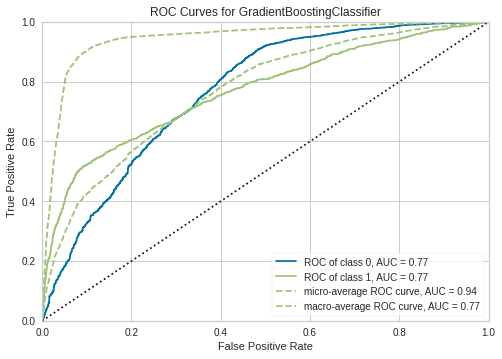

In [ ]:
plot_model(model)

In [ ]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8922,0.7315,0.1627,0.6207,0.2578,0.2205,0.2794
1,0.8966,0.7937,0.1511,0.7463,0.2513,0.2211,0.3055
2,0.8956,0.7849,0.1994,0.6471,0.3048,0.2651,0.3197
3,0.8907,0.7759,0.1541,0.5930,0.2446,0.2071,0.2630
4,0.8946,0.7677,0.1571,0.6753,0.2549,0.2212,0.2913
5,0.8925,0.7666,0.1566,0.6341,0.2512,0.2154,0.2782
6,0.8991,0.7784,0.2018,0.7204,0.3153,0.2790,0.3462
7,0.8994,0.7761,0.1837,0.7625,0.2961,0.2632,0.3426
8,0.8963,0.7926,0.1988,0.6667,0.3063,0.2675,0.3258
9,0.8894,0.7521,0.1446,0.5783,0.2313,0.1942,0.2498


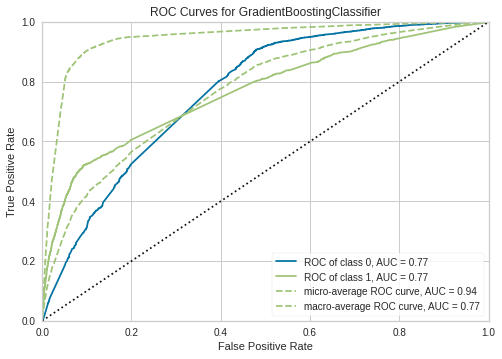

In [ ]:
plot_model(tuned_model)

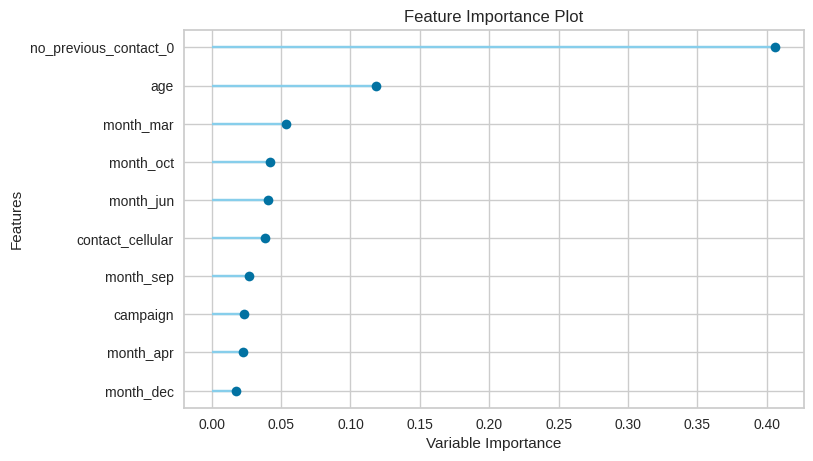

In [ ]:
plot_model(tuned_model, plot='feature')